In [17]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
#conda install -c conda-forge mlxtend

In [18]:
movie=pd.read_csv("E:/ASSIGNMENT FROM EXCELR/Association Rules/my_movies.csv")
movie

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [19]:
movie.isnull()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False
2,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False
5,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False
6,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False
7,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False
8,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


In [20]:
movie.isnull().sum()

V1               0
V2               0
V3               3
V4               8
V5               9
Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [21]:
movie.dropna(subset=['V3'], inplace=True)
movie.dropna(subset=['V4'], inplace=True)
movie.dropna(subset=['V5'], inplace=True)

In [22]:
movie.isnull().sum()

V1               0
V2               0
V3               0
V4               0
V5               0
Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [23]:
movie

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1


In [24]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 0 to 0
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             1 non-null      object
 1   V2             1 non-null      object
 2   V3             1 non-null      object
 3   V4             1 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    1 non-null      int64 
 6   Gladiator      1 non-null      int64 
 7   LOTR1          1 non-null      int64 
 8   Harry Potter1  1 non-null      int64 
 9   Patriot        1 non-null      int64 
 10  LOTR2          1 non-null      int64 
 11  Harry Potter2  1 non-null      int64 
 12  LOTR           1 non-null      int64 
 13  Braveheart     1 non-null      int64 
 14  Green Mile     1 non-null      int64 
dtypes: int64(10), object(5)
memory usage: 128.0+ bytes


# Pre-Processing

In [25]:
df=pd.get_dummies(movie)# this creates dummy variables for all the data
df.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,V1_Sixth Sense,V2_LOTR1,V3_Harry Potter1,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,1,1,1,1,1


In [26]:
df.describe()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,V1_Sixth Sense,V2_LOTR1,V3_Harry Potter1,V4_Green Mile,V5_LOTR2
count,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
50%,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
75%,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
max,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0


# Apriori Algorithm

In [27]:
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,1.0,(Sixth Sense)
1,1.0,(LOTR1)
2,1.0,(Harry Potter1)
3,1.0,(LOTR2)
4,1.0,(Green Mile)
...,...,...
1018,1.0,"(Sixth Sense, V2_LOTR1, Harry Potter1, V3_Harr..."
1019,1.0,"(LOTR2, Sixth Sense, V2_LOTR1, V3_Harry Potter..."
1020,1.0,"(LOTR2, Sixth Sense, V2_LOTR1, Harry Potter1, ..."
1021,1.0,"(LOTR2, V2_LOTR1, Harry Potter1, V3_Harry Pott..."


In [28]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(LOTR1),1.0,1.0,1.0,1.0,1.0,0.0,inf
1,(LOTR1),(Sixth Sense),1.0,1.0,1.0,1.0,1.0,0.0,inf
2,(Sixth Sense),(Harry Potter1),1.0,1.0,1.0,1.0,1.0,0.0,inf
3,(Harry Potter1),(Sixth Sense),1.0,1.0,1.0,1.0,1.0,0.0,inf
4,(LOTR2),(Sixth Sense),1.0,1.0,1.0,1.0,1.0,0.0,inf
...,...,...,...,...,...,...,...,...,...
56997,(LOTR1),"(LOTR2, Sixth Sense, V2_LOTR1, Harry Potter1, ...",1.0,1.0,1.0,1.0,1.0,0.0,inf
56998,(V5_LOTR2),"(LOTR2, Sixth Sense, V2_LOTR1, Harry Potter1, ...",1.0,1.0,1.0,1.0,1.0,0.0,inf
56999,(V1_Sixth Sense),"(LOTR2, Sixth Sense, V2_LOTR1, Harry Potter1, ...",1.0,1.0,1.0,1.0,1.0,0.0,inf
57000,(Green Mile),"(LOTR2, Sixth Sense, V2_LOTR1, Harry Potter1, ...",1.0,1.0,1.0,1.0,1.0,0.0,inf


In [29]:
len(rules)

57002

In [30]:
rules.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(LOTR1),1.0,1.0,1.0,1.0,1.0,0.0,inf
38004,"(LOTR2, V3_Harry Potter1, Green Mile)","(V1_Sixth Sense, LOTR1, V5_LOTR2, V4_Green Mile)",1.0,1.0,1.0,1.0,1.0,0.0,inf
37993,"(V1_Sixth Sense, V3_Harry Potter1, V5_LOTR2, V...","(LOTR2, LOTR1, Green Mile)",1.0,1.0,1.0,1.0,1.0,0.0,inf
37994,"(V3_Harry Potter1, V5_LOTR2, V4_Green Mile, Gr...","(LOTR2, V1_Sixth Sense, LOTR1)",1.0,1.0,1.0,1.0,1.0,0.0,inf
37995,"(V1_Sixth Sense, V3_Harry Potter1, Green Mile,...","(LOTR2, LOTR1, V5_LOTR2)",1.0,1.0,1.0,1.0,1.0,0.0,inf
37996,"(V1_Sixth Sense, LOTR1, V5_LOTR2, Green Mile)","(LOTR2, V3_Harry Potter1, V4_Green Mile)",1.0,1.0,1.0,1.0,1.0,0.0,inf
37997,"(V1_Sixth Sense, LOTR1, V5_LOTR2, V4_Green Mile)","(LOTR2, V3_Harry Potter1, Green Mile)",1.0,1.0,1.0,1.0,1.0,0.0,inf
37998,"(LOTR1, V5_LOTR2, V4_Green Mile, Green Mile)","(LOTR2, V1_Sixth Sense, V3_Harry Potter1)",1.0,1.0,1.0,1.0,1.0,0.0,inf
37999,"(V1_Sixth Sense, LOTR1, Green Mile, V4_Green M...","(LOTR2, V3_Harry Potter1, V5_LOTR2)",1.0,1.0,1.0,1.0,1.0,0.0,inf
38000,"(V1_Sixth Sense, V5_LOTR2, V4_Green Mile, Gree...","(LOTR2, V3_Harry Potter1, LOTR1)",1.0,1.0,1.0,1.0,1.0,0.0,inf


In [31]:
rules[rules.lift>=1]
#this gives rules greater than 1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(LOTR1),1.0,1.0,1.0,1.0,1.0,0.0,inf
1,(LOTR1),(Sixth Sense),1.0,1.0,1.0,1.0,1.0,0.0,inf
2,(Sixth Sense),(Harry Potter1),1.0,1.0,1.0,1.0,1.0,0.0,inf
3,(Harry Potter1),(Sixth Sense),1.0,1.0,1.0,1.0,1.0,0.0,inf
4,(LOTR2),(Sixth Sense),1.0,1.0,1.0,1.0,1.0,0.0,inf
...,...,...,...,...,...,...,...,...,...
56997,(LOTR1),"(LOTR2, Sixth Sense, V2_LOTR1, Harry Potter1, ...",1.0,1.0,1.0,1.0,1.0,0.0,inf
56998,(V5_LOTR2),"(LOTR2, Sixth Sense, V2_LOTR1, Harry Potter1, ...",1.0,1.0,1.0,1.0,1.0,0.0,inf
56999,(V1_Sixth Sense),"(LOTR2, Sixth Sense, V2_LOTR1, Harry Potter1, ...",1.0,1.0,1.0,1.0,1.0,0.0,inf
57000,(Green Mile),"(LOTR2, Sixth Sense, V2_LOTR1, Harry Potter1, ...",1.0,1.0,1.0,1.0,1.0,0.0,inf


E:\Anaconda\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


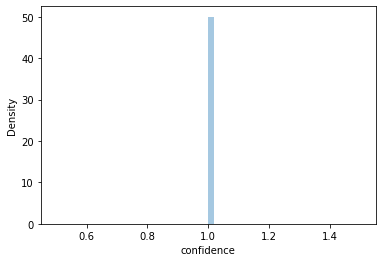

In [37]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.distplot(rules.confidence);

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='confidence'>

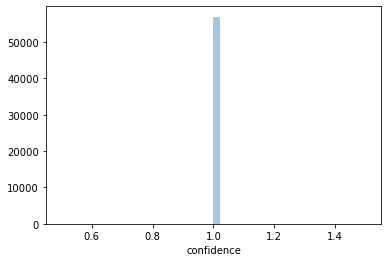

In [38]:
sns.distplot(rules.confidence,kde=False)

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='confidence', ylabel='Density'>

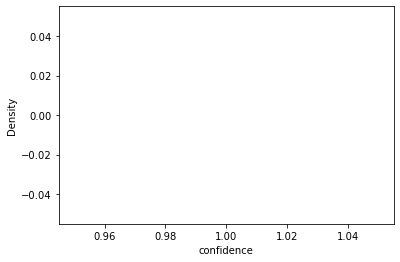

In [39]:
sns.distplot(rules.confidence,hist=False)